<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/I_CNN_Nova_Base_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


#Definição das bibliotecas 

In [2]:
import tensorflow as tf 
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import os
import pathlib
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#Carragemento dos dados 

In [3]:
!git clone https://github.com/jenaroaaugusto/HOMUS

Cloning into 'HOMUS'...
remote: Enumerating objects: 30612, done.
remote: Counting objects: 100% (30612/30612), done.
remote: Compressing objects: 100% (30516/30516), done.
remote: Total 30612 (delta 144), reused 30548 (delta 84), pack-reused 0
Receiving objects: 100% (30612/30612), 10.67 MiB | 25.53 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Checking out files: 100% (63600/63600), done.


In [4]:
!ls HOMUS

audiveris_omr_raw  conjunto  Dataset-Teste  imagens  README.md	separado


In [5]:
dadoscompletos=os.path.join('HOMUS/', 'imagens')

In [6]:
dadoscompletos

'HOMUS/imagens'

In [7]:
train_dir = pathlib.Path(""+dadoscompletos)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.png')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

HOMUS/imagens
15200
['Cut-Time' '3-4-Time' 'Sixteenth-Note' 'Common-Time' '6-8-Time' 'Natural'
 'G-Clef' '12-8-Time' 'Half-Note' 'Thirty-Two-Rest' 'Sharp' 'Barline'
 'Flat' 'Thirty-Two-Note' 'C-Clef' 'Whole-Note' 'Double-Sharp'
 'Sixty-Four-Rest' '2-2-Time' 'Sixteenth-Rest' '3-8-Time' 'Dot' '9-8-Time'
 'F-Clef' 'Quarter-Note' '4-4-Time' 'Eighth-Rest' 'Whole-Half-Rest'
 'Eighth-Note' '2-4-Time' 'Sixty-Four-Note' 'Quarter-Rest']


In [8]:
meusdados=[]

In [9]:
for i in os.scandir(train_dir):
    if i.is_dir():
        meusdados.append(i.path)

In [10]:
somas=0
tag=0
for i in meusdados:

  train_dir = pathlib.Path(i)
  print(train_dir)
  nomes = list(train_dir.glob('*.png'))

  total_train = len(list(train_dir.glob('*.png')))
  total_train=int(total_train)
  somas=somas+total_train
  print(total_train)
  tag=+1
print(f'Numero total:{somas}')

HOMUS/imagens/Cut-Time
404
HOMUS/imagens/3-4-Time
400
HOMUS/imagens/Sixteenth-Note
801
HOMUS/imagens/Common-Time
400
HOMUS/imagens/6-8-Time
400
HOMUS/imagens/Natural
400
HOMUS/imagens/G-Clef
400
HOMUS/imagens/12-8-Time
400
HOMUS/imagens/Half-Note
799
HOMUS/imagens/Thirty-Two-Rest
400
HOMUS/imagens/Sharp
400
HOMUS/imagens/Barline
402
HOMUS/imagens/Flat
399
HOMUS/imagens/Thirty-Two-Note
799
HOMUS/imagens/C-Clef
400
HOMUS/imagens/Whole-Note
400
HOMUS/imagens/Double-Sharp
400
HOMUS/imagens/Sixty-Four-Rest
400
HOMUS/imagens/2-2-Time
396
HOMUS/imagens/Sixteenth-Rest
400
HOMUS/imagens/3-8-Time
400
HOMUS/imagens/Dot
400
HOMUS/imagens/9-8-Time
400
HOMUS/imagens/F-Clef
400
HOMUS/imagens/Quarter-Note
801
HOMUS/imagens/4-4-Time
400
HOMUS/imagens/Eighth-Rest
400
HOMUS/imagens/Whole-Half-Rest
400
HOMUS/imagens/Eighth-Note
800
HOMUS/imagens/2-4-Time
400
HOMUS/imagens/Sixty-Four-Note
799
HOMUS/imagens/Quarter-Rest
400
Numero total:15200


#CODIGO

In [11]:
trainDir = os.path.join('HOMUS/conjunto', 'train')
# validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')
testDir= os.path.join('HOMUS/conjunto','val')

In [12]:
trainDir

'HOMUS/conjunto/train'

In [13]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.png')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

HOMUS/conjunto/train
10636
['Cut-Time' '3-4-Time' 'Sixteenth-Note' 'Common-Time' '6-8-Time' 'Natural'
 'G-Clef' '12-8-Time' 'Half-Note' 'Thirty-Two-Rest' 'Sharp' 'Barline'
 'Flat' 'Thirty-Two-Note' 'C-Clef' 'Whole-Note' 'Double-Sharp'
 'Sixty-Four-Rest' '2-2-Time' 'Sixteenth-Rest' '3-8-Time' 'Dot' '9-8-Time'
 'F-Clef' 'Quarter-Note' '4-4-Time' 'Eighth-Rest' 'Whole-Half-Rest'
 'Eighth-Note' '2-4-Time' 'Sixty-Four-Note' 'Quarter-Rest']


In [14]:
test_dir = pathlib.Path(""+testDir)
print(test_dir)
total_test = len(list(test_dir.glob('*/*.png')))
print(total_test)
CLASS_NAMEST=np.array(os.listdir(test_dir))
print(CLASS_NAMEST)

HOMUS/conjunto/val
4564
['Cut-Time' '3-4-Time' 'Sixteenth-Note' 'Common-Time' '6-8-Time' 'Natural'
 'G-Clef' '12-8-Time' 'Half-Note' 'Thirty-Two-Rest' 'Sharp' 'Barline'
 'Flat' 'Thirty-Two-Note' 'C-Clef' 'Whole-Note' 'Double-Sharp'
 'Sixty-Four-Rest' '2-2-Time' 'Sixteenth-Rest' '3-8-Time' 'Dot' '9-8-Time'
 'F-Clef' 'Quarter-Note' '4-4-Time' 'Eighth-Rest' 'Whole-Half-Rest'
 'Eighth-Note' '2-4-Time' 'Sixty-Four-Note' 'Quarter-Rest']


In [15]:
validacao=[]
treinamento=[]

In [16]:
for i in os.scandir('HOMUS/conjunto/train'):
    if i.is_dir():
        treinamento.append(i.path)

In [17]:
for i in os.scandir('HOMUS/conjunto/val'):
    if i.is_dir():
        validacao.append(i.path)

In [18]:
print(validacao)

['HOMUS/conjunto/val/Cut-Time', 'HOMUS/conjunto/val/3-4-Time', 'HOMUS/conjunto/val/Sixteenth-Note', 'HOMUS/conjunto/val/Common-Time', 'HOMUS/conjunto/val/6-8-Time', 'HOMUS/conjunto/val/Natural', 'HOMUS/conjunto/val/G-Clef', 'HOMUS/conjunto/val/12-8-Time', 'HOMUS/conjunto/val/Half-Note', 'HOMUS/conjunto/val/Thirty-Two-Rest', 'HOMUS/conjunto/val/Sharp', 'HOMUS/conjunto/val/Barline', 'HOMUS/conjunto/val/Flat', 'HOMUS/conjunto/val/Thirty-Two-Note', 'HOMUS/conjunto/val/C-Clef', 'HOMUS/conjunto/val/Whole-Note', 'HOMUS/conjunto/val/Double-Sharp', 'HOMUS/conjunto/val/Sixty-Four-Rest', 'HOMUS/conjunto/val/2-2-Time', 'HOMUS/conjunto/val/Sixteenth-Rest', 'HOMUS/conjunto/val/3-8-Time', 'HOMUS/conjunto/val/Dot', 'HOMUS/conjunto/val/9-8-Time', 'HOMUS/conjunto/val/F-Clef', 'HOMUS/conjunto/val/Quarter-Note', 'HOMUS/conjunto/val/4-4-Time', 'HOMUS/conjunto/val/Eighth-Rest', 'HOMUS/conjunto/val/Whole-Half-Rest', 'HOMUS/conjunto/val/Eighth-Note', 'HOMUS/conjunto/val/2-4-Time', 'HOMUS/conjunto/val/Sixty-Fo

In [19]:
somas=0
tag=0
for i in treinamento:

  train_dir = pathlib.Path(i)
  print(train_dir)
  nomes = list(train_dir.glob('*.png'))

  total_train = len(list(train_dir.glob('*.png')))
  total_train=int(total_train)
  somas=somas+total_train
  print(total_train)
  tag=+1
print(f'Numero total:{somas}')

HOMUS/conjunto/train/Cut-Time
282
HOMUS/conjunto/train/3-4-Time
280
HOMUS/conjunto/train/Sixteenth-Note
560
HOMUS/conjunto/train/Common-Time
280
HOMUS/conjunto/train/6-8-Time
280
HOMUS/conjunto/train/Natural
280
HOMUS/conjunto/train/G-Clef
280
HOMUS/conjunto/train/12-8-Time
280
HOMUS/conjunto/train/Half-Note
559
HOMUS/conjunto/train/Thirty-Two-Rest
280
HOMUS/conjunto/train/Sharp
280
HOMUS/conjunto/train/Barline
281
HOMUS/conjunto/train/Flat
279
HOMUS/conjunto/train/Thirty-Two-Note
559
HOMUS/conjunto/train/C-Clef
280
HOMUS/conjunto/train/Whole-Note
280
HOMUS/conjunto/train/Double-Sharp
280
HOMUS/conjunto/train/Sixty-Four-Rest
280
HOMUS/conjunto/train/2-2-Time
277
HOMUS/conjunto/train/Sixteenth-Rest
280
HOMUS/conjunto/train/3-8-Time
280
HOMUS/conjunto/train/Dot
280
HOMUS/conjunto/train/9-8-Time
280
HOMUS/conjunto/train/F-Clef
280
HOMUS/conjunto/train/Quarter-Note
560
HOMUS/conjunto/train/4-4-Time
280
HOMUS/conjunto/train/Eighth-Rest
280
HOMUS/conjunto/train/Whole-Half-Rest
280
HOMUS/conj

In [20]:
train_data = pd.DataFrame(columns=['caminho','label'])
test_data = pd.DataFrame(columns=['caminho','label'])

In [21]:
tag=0
for j in treinamento:
  train_dir = pathlib.Path(j)
  for i in train_dir.iterdir():
    af=str(i)
    train_data = train_data.append({'caminho': af,'label':str(tag)}, ignore_index=True)
  tag=tag+1


In [22]:
tag=0
for j in validacao:
  test_dir = pathlib.Path(j)
  for i in test_dir.iterdir():
    af=str(i)
    test_data = test_data.append({'caminho': af,'label':str(tag)}, ignore_index=True)
  tag=tag+1

#Validação Cruzada


In [23]:
Y = train_data[['label']]
X = train_data[['caminho']]

kf = KFold(n_splits = 5)
                         
skf = StratifiedKFold(5,  shuffle = True,random_state = 7) 

In [24]:
len(Y),len(X)


(10636, 10636)

#Definição do Generator

In [25]:
idg = ImageDataGenerator( zoom_range=0.28,
                          shear_range=0.2,
                          width_shift_range=.23,
                          height_shift_range=.15,
                          rotation_range=47,
                          vertical_flip=True,
                          horizontal_flip = True,
                          fill_mode='nearest',
                          rescale=1./255)
vale = ImageDataGenerator(rescale=1./255)

#Definição sobre salvar modelo

In [26]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'
    

#Definição de parametro

In [27]:
batch_size = 128
num_epochs = 500
IMG_HEIGHT =92
IMG_WIDTH = 92

#Definição de metricas

In [28]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [29]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

#CNN

In [30]:
# def create_model():
#   model = models.Sequential()
#   model.add(ZeroPadding2D((1,1),input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
#   model.add(layers.Conv2D(64, (2, 2),padding="same",dilation_rate=(1, 1),activation='relu'))
#   model.add(ZeroPadding2D((1,1)))
#   model.add(layers.Conv2D(256, (2, 2), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(512, (2, 2), activation='relu'))
#   model.add(layers.MaxPooling2D(2,2))

#   model.add(layers.Flatten())
#   model.add(layers.Dense(1024, activation='relu'))
#   model.add(layers.Dropout(0.2))
#   model.add(layers.Dense(256, activation='relu'))
#   model.add(layers.Dense(128,activation='relu'))
#   model.add(layers.Dense(64, activation='relu'))
#   model.add(Dense(32,activation='softmax'))
  
 
#   # COMPILE NEW MODEL
#   model.compile(loss='categorical_crossentropy',
#           optimizer="adam",
#           metrics=METRICS)
#   return model

# def create_model():
#     model = Sequential()
#     model.add(ZeroPadding2D((1,1),input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(1024, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dense(32, activation='softmax'))

 
#     # COMPILE NEW MODEL
#     model.compile(loss='categorical_crossentropy',
#             optimizer="adam",
#             metrics=METRICS)
#     return model

In [31]:
# def create_model():
#     model = Sequential()
#     model.add(ZeroPadding2D((1,1),input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
    
#     model.add(ZeroPadding2D((1,1)))
#     model.add(layers.Conv2D(256, (2, 2), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(layers.Conv2D(256, (2, 2), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(1024, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(32, activation='softmax'))

 
#     # COMPILE NEW MODEL
#     model.compile(loss='categorical_crossentropy',
#             optimizer="adam",
#             metrics=METRICS)
#     return model

In [32]:
def create_model():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.MaxPooling2D(2,2))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.MaxPooling2D(2,2))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(256, (2, 2), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(256, (2, 2), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='softmax'))

 
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=METRICS)
    return model

In [33]:
model=create_model()

In [34]:
!mkdir -p saved_model 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 94, 94, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 92, 92, 64)        640       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 94, 94, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)        

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0

#Codigo

In [36]:
%%time
save_dir = '/content/drive/My Drive/Pesos/'
fold_var = 1

for train_index, val_index in skf.split(X,Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]
  # print(training_data)

  train_data_generator = idg.flow_from_dataframe(training_data,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                directory = None,
                                                x_col = 'caminho',
                                                y_col = 'label',
                                                class_mode = "categorical",
                                                color_mode="grayscale",
                                                batch_size=128,
                                                shuffle = True)

  valid_data_generator  = vale.flow_from_dataframe(validation_data,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  directory = None,
                                                  x_col = "caminho", 
                                                  y_col = "label",
                                                  color_mode="grayscale",
                                                  batch_size=128,
                                                  class_mode = "categorical",
                                                  shuffle = False)

  # CREATE NEW MODEL
  model=create_model()
 
  # COMPILE NEW MODEL
  model.compile(loss='categorical_crossentropy',
          optimizer="adam",
          metrics=METRICS)

  # CREATE CALLBACKS
  checkpoint= tf.keras.callbacks.ModelCheckpoint(
                      save_dir+get_model_name(fold_var),
                      monitor='val_recall', save_best_only=True, 
                      mode='max',verbose=1)
  callbacks_list = [checkpoint]
  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
  # ,early_stop
  # There can be other callbacks, but just showing one because it involves the model name
  # This saves the best model
  # FIT THE MODEL
  history = model.fit(train_data_generator,
          epochs=num_epochs,
          callbacks=[callbacks_list,early_stop],
          validation_data=valid_data_generator)
  #PLOT HISTORY
  #		:
  #		:

  # LOAD BEST MODEL to evaluate the performance of the model
  

  model.load_weights(save_dir+"model_"+str(fold_var)+".h5")
  print("----------------------------------------------------------------------------------")
  results = model.evaluate(valid_data_generator)
  print("__________________________________________________________________________________")
  for name, value in zip(model.metrics_names, results):
      print(name, ': ', value)
  print("__________________________________________________________________________________")
  results = dict(zip(model.metrics_names,results))
  perda =results['loss']
  acerto=results['accuracy']
  
  print(f'Score for fold {fold_var}: {model.metrics_names[0]} of {perda}; {model.metrics_names[5]} of {acerto*100}%')

  print("__________________________________________________________________________________")

  
  np.save("model_history_"+str(fold_var),history.history)
  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_LOSS.append(results['loss'])
  
  
  path="saved_model/model_"+str(fold_var)
  model.save(path) 
  tf.keras.backend.clear_session()

  fold_var += 1

Found 8508 validated image filenames belonging to 32 classes.
Found 2128 validated image filenames belonging to 32 classes.
Epoch 1/500
67/67 [==============================] - 53s 257ms/step - loss: 3.4436 - tp: 0.0294 - fp: 0.0294 - tn: 136713.6176 - fn: 4410.0882 - accuracy: 0.9688 - precision: 0.0147 - recall: 3.4570e-06 - auc: 0.5584 - val_loss: 3.2009 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 65967.0000 - val_fn: 2128.0000 - val_accuracy: 0.9687 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6705

Epoch 00001: val_recall improved from -inf to 0.00000, saving model to /content/drive/My Drive/Pesos/model_1.h5
Epoch 2/500
67/67 [==============================] - 14s 209ms/step - loss: 3.2504 - tp: 22.3088 - fp: 30.4706 - tn: 135474.1765 - fn: 4348.8088 - accuracy: 0.9687 - precision: 0.3728 - recall: 0.0042 - auc: 0.6471 - val_loss: 3.0644 - val_tp: 21.0000 - val_fp: 2.0000 - val_tn: 65966.0000 - val_fn: 2107.0000 - val_accuracy: 0.9690 - val_precision: 0.91

#Folds 

In [37]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(VALIDATION_ACCURACY)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {VALIDATION_LOSS[i]} - Accuracy: {VALIDATION_ACCURACY[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(VALIDATION_ACCURACY)} (+- {np.std(VALIDATION_ACCURACY)})')
print(f'> Loss: {np.mean(VALIDATION_LOSS)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4679160714149475 - Accuracy: 0.9910714030265808%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5339013338088989 - Accuracy: 0.988349199295044%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.33939996361732483 - Accuracy: 0.9932416677474976%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.7266696095466614 - Accuracy: 0.9861453771591187%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.3576425313949585 - Accuracy: 0.9926245808601379%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.9902864456176758 (+- 0.002672741801051277)
> Loss: 0.4851059019565582
--------------------

#Carregar Dados

Found **8508** validated image filenames belonging to 32 
classes.

Found **2128** validated image filenames belonging to 32 classes.

---

67/67 [==============================] - 3s 44ms/step - loss: 0.9991 - tp: 1165.0000 - fp: 289.0000 - tn: 65679.0000 - fn: 963.0000 - accuracy: 0.9816 - precision: 0.8012 - recall: 0.5475 - auc: 0.9778

* Score for fold 1: loss of 1.04203295707770264; accuracy of 98.06890487670898%

* Score for fold 2: loss of 1.0758403539657593; accuracy of 98.05623888969421%

* Score for fold 3: loss of 0.993084728717804; accuracy of 98.14439415931702%

* Score for fold 4: loss of 0.9881165623664856; accuracy of 98.19581508636475%

* Score for fold 5: loss of 1.027451992034912; accuracy of 98.14292192459106%

In [ ]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_16 (ZeroPaddi (None, 94, 94, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 92, 92, 64)        640       
_________________________________________________________________
zero_padding2d_17 (ZeroPaddi (None, 94, 94, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 92, 92, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 64)       

In [ ]:
# /content/drive/My Drive/Pesos/model_1.h5

In [ ]:
model.load_weights('/content/drive/My Drive/Pesos/model_1.h5')

#Visualizar 


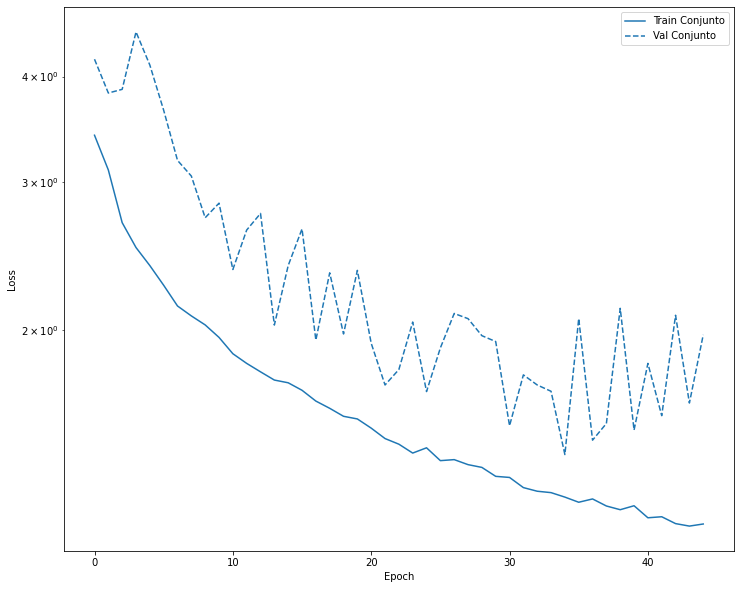

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()
plot_loss(history, "Conjunto", 0)

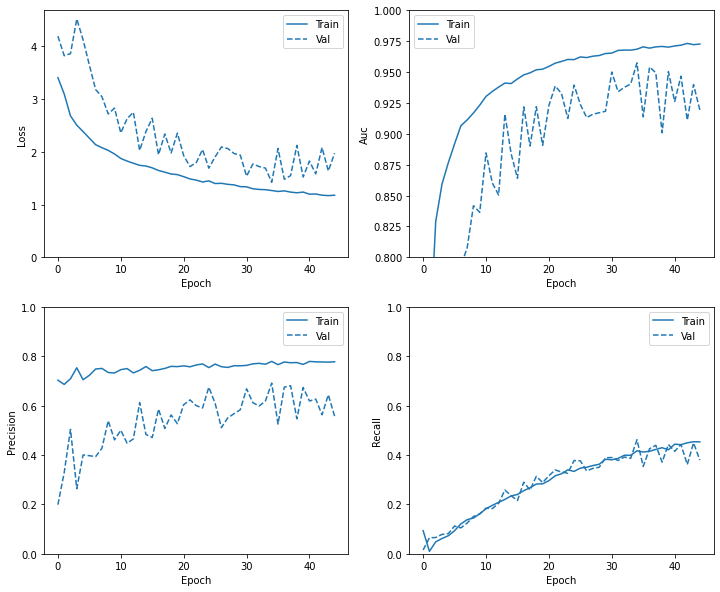

In [ ]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    
    plt.legend()
    # plt.figure(figsize=(5, 5))
    plt.savefig("metricasG.png")

plot_metrics(history)


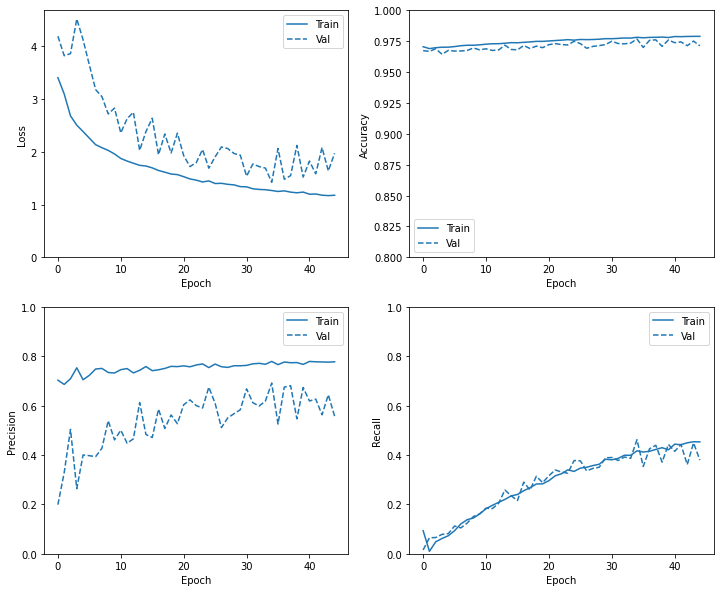

In [ ]:
def plot_metrics(history):
  metrics =  ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'accuracy':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    
    plt.legend()
    # plt.figure(figsize=(5, 5))
    plt.savefig("metricasG.pdf")

plot_metrics(history)

In [ ]:
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

In [ ]:
hist['accuracy']

0     0.970437
1     0.968919
2     0.969642
3     0.970050
4     0.970076
5     0.970550
6     0.971255
7     0.971629
8     0.971633
9     0.971952
10    0.972503
11    0.972830
12    0.972874
13    0.973245
14    0.973734
15    0.973631
16    0.973998
17    0.974321
18    0.974769
19    0.974766
20    0.975089
21    0.975445
22    0.975746
23    0.976169
24    0.975765
25    0.976312
26    0.976183
27    0.976275
28    0.976521
29    0.976951
30    0.976936
31    0.977186
32    0.977509
33    0.977425
34    0.978067
35    0.977678
36    0.977979
37    0.978082
38    0.978251
39    0.977895
40    0.978670
41    0.978589
42    0.978743
43    0.978824
44    0.978842
Name: accuracy, dtype: float64

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
hist.to_csv('out.zip', index=False,
          compression=compression_opts) 

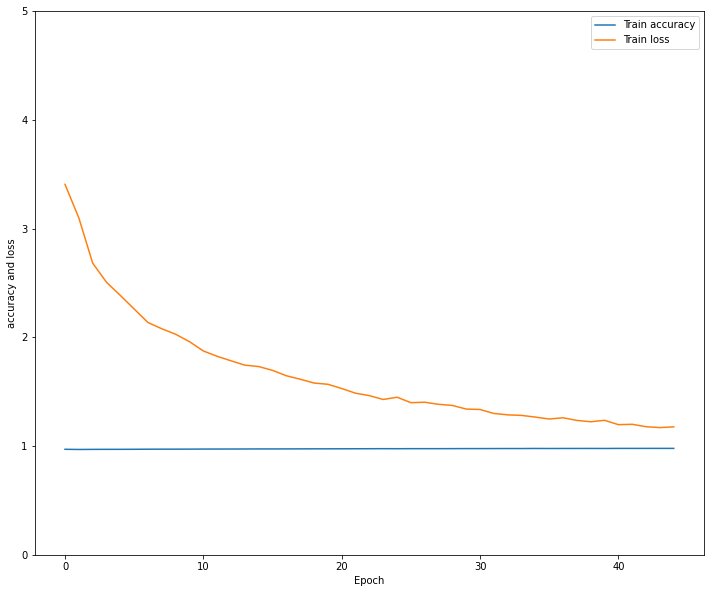

In [ ]:
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy and loss')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train accuracy')
  plt.plot(hist['epoch'], hist['loss'],
           label = 'Train loss')
  plt.ylim([0,5])
  plt.legend()
  plt.show()

In [ ]:
hist

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epoch
0,3.407430,995.0,421.0,329295.0,9641.0,0.970437,0.702684,0.093550,0.698360,4.194400,33.0,133.0,65804.0,2094.0,0.967281,0.198795,0.015515,0.605149,0
1,3.098396,85.0,39.0,263740.0,8424.0,0.968919,0.685484,0.009989,0.726229,3.824373,138.0,282.0,65655.0,1989.0,0.966634,0.328571,0.064880,0.665525,1
2,2.682757,413.0,170.0,263609.0,8096.0,0.969642,0.708405,0.048537,0.829071,3.862807,140.0,138.0,65799.0,1987.0,0.968779,0.503597,0.065820,0.684212,2
3,2.506336,527.0,173.0,263606.0,7982.0,0.970050,0.752857,0.061934,0.859234,4.519888,167.0,467.0,65470.0,1960.0,0.964342,0.263407,0.078514,0.645006,3
4,2.385540,622.0,261.0,263518.0,7887.0,0.970076,0.704417,0.073099,0.876523,4.128076,174.0,261.0,65676.0,1953.0,0.967472,0.400000,0.081805,0.683359,4
5,2.260530,796.0,306.0,263473.0,7713.0,0.970550,0.722323,0.093548,0.891855,3.647925,239.0,363.0,65574.0,1888.0,0.966928,0.397010,0.112365,0.732425,5
6,2.136133,1029.0,347.0,263432.0,7480.0,0.971255,0.747820,0.120931,0.906453,3.180834,223.0,344.0,65593.0,1904.0,0.966972,0.393298,0.104842,0.792903,6
7,2.078891,1175.0,391.0,263388.0,7334.0,0.971629,0.750319,0.138089,0.911196,3.047360,265.0,355.0,65582.0,1862.0,0.967428,0.427419,0.124589,0.807693,7
8,2.028359,1232.0,447.0,263332.0,7277.0,0.971633,0.733770,0.144788,0.916809,2.719050,321.0,275.0,65662.0,1806.0,0.969426,0.538591,0.150917,0.841749,8
9,1.960234,1377.0,505.0,263274.0,7132.0,0.971952,0.731668,0.161829,0.923132,2.829680,344.0,402.0,65535.0,1783.0,0.967898,0.461126,0.161730,0.836420,9


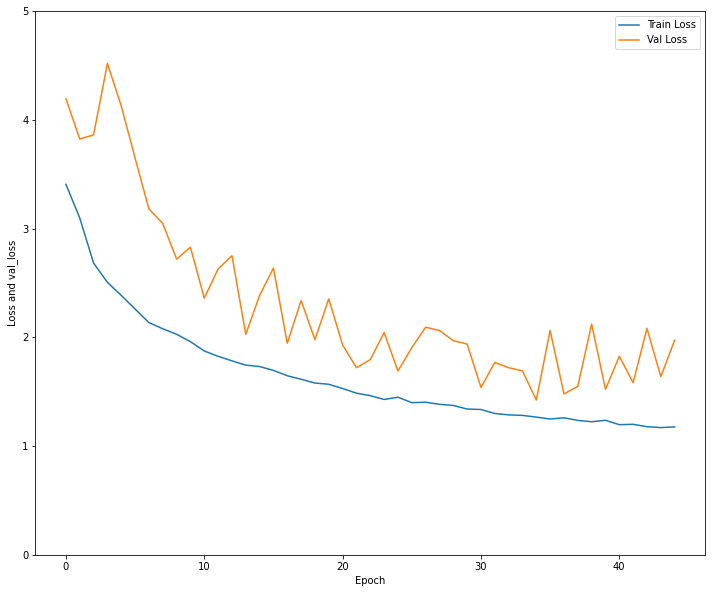

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss and val_loss')
plt.plot(hist['epoch'], hist['loss'],
          label='Train Loss')
plt.plot(hist['epoch'], hist['val_loss'],
          label = 'Val Loss')
plt.ylim([0,5])
plt.legend()

# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('Mean Square Error [$MPG^2$]')
# plt.plot(hist['epoch'], hist['mse'],
#          label='Train Error')
# plt.plot(hist['epoch'], hist['val_mse'],
#          label = 'Val Error')
# plt.ylim([0,20])
# plt.legend()
plt.show()

In [ ]:
history.params

{'epochs': 500, 'steps': 67, 'verbose': 1}

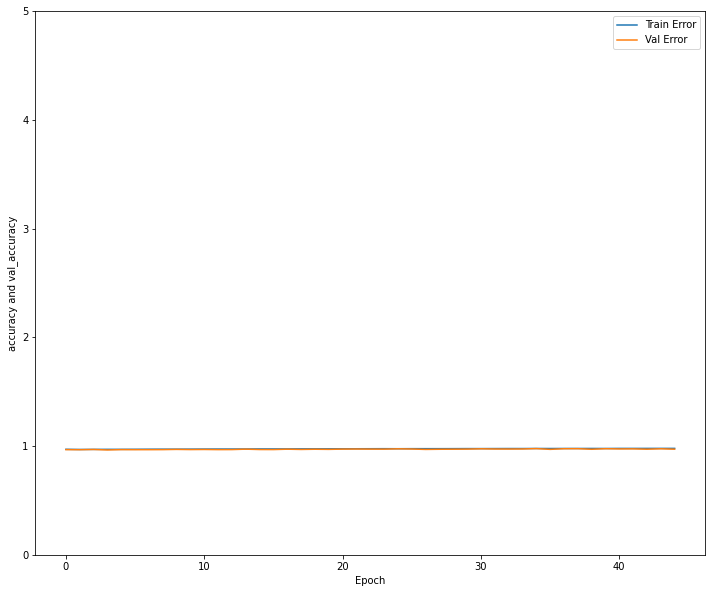

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy and val_accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  # plt.figure()
  # plt.xlabel('Epoch')
  # plt.ylabel('Mean Square Error [$MPG^2$]')
  # plt.plot(hist['epoch'], hist['mse'],
  #          label='Train Error')
  # plt.plot(hist['epoch'], hist['val_mse'],
  #          label = 'Val Error')
  # plt.ylim([0,20])
  # plt.legend()
  plt.show()


plot_history(history)

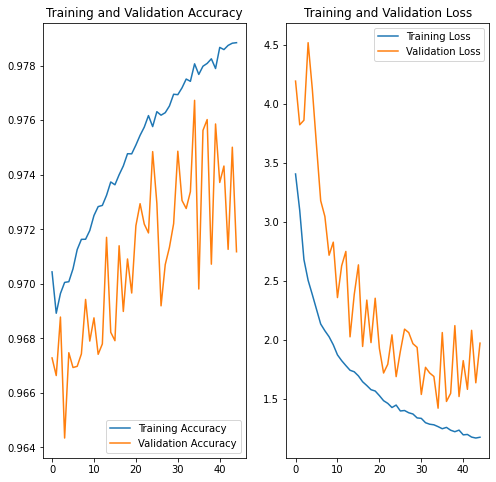

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, acc, label='Training Accuracy')
plt.plot(history.epoch, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.epoch, loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("traning.pdf")
plt.show()

#Dados de Teste
Preparação de dados para previsão

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
test_set = test_datagen.flow_from_dataframe(test_data,
                                        directory = None,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=128,
                                        x_col = "caminho", 
                                        y_col = "label",
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = False)

Found 4564 validated image filenames belonging to 32 classes.


#Evolução

In [40]:
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
36/36 [==============================] - 4s 120ms/step - loss: 0.3871 - tp: 3885.0000 - fp: 495.0000 - tn: 140989.0000 - fn: 679.0000 - accuracy: 0.9920 - precision: 0.8870 - recall: 0.8512 - auc: 0.9945
test loss, test acc: [0.38711002469062805, 3885.0, 495.0, 140989.0, 679.0, 0.9919615387916565, 0.8869863152503967, 0.8512269854545593, 0.9945335388183594]


In [41]:
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

loss :  0.38711002469062805
tp :  3885.0
fp :  495.0
tn :  140989.0
fn :  679.0
accuracy :  0.9919615387916565
precision :  0.8869863152503967
recall :  0.8512269854545593
auc :  0.9945335388183594



#Previsão

In [42]:
test_predictions_baseline = model.predict(test_set)

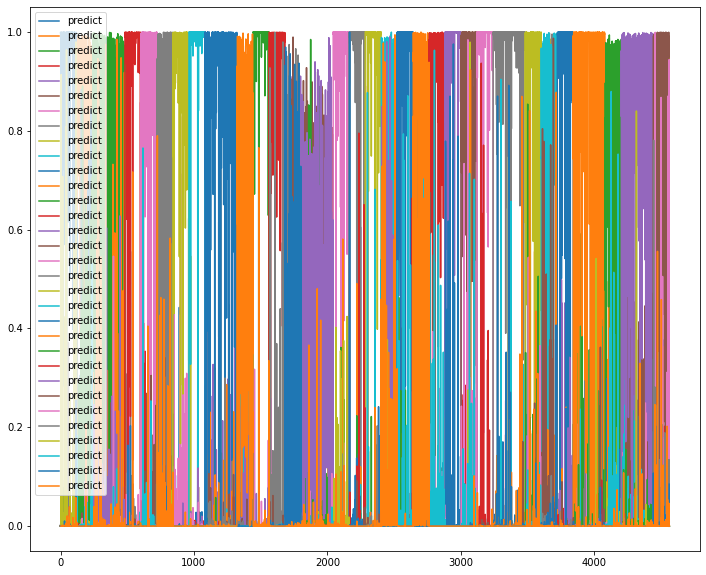

In [43]:
plt.plot(test_predictions_baseline, label="predict")
plt.legend()
plt.show()


In [44]:
true_labels =test_set.classes

In [45]:
len(true_labels)

4564

In [46]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in test_predictions_baseline])

In [47]:
len(y_pred)

4564

In [48]:
y_pred

array([ 0,  0,  0, ..., 25, 26, 25])

In [49]:
len(y_true)

4564

In [50]:
Matrix=tf.math.confusion_matrix(y_true,y_pred)

In [51]:
Matrix

<tf.Tensor: shape=(32, 32), dtype=int32, numpy=
array([[115,   0,   0, ...,   0,   0,   0],
       [  0,  98,   0, ...,   1,   0,   0],
       [  0,   0, 119, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 118,   0,   0],
       [  0,   0,   0, ...,   0, 222,   0],
       [  0,   0,   1, ...,   0,   0,  87]], dtype=int32)>

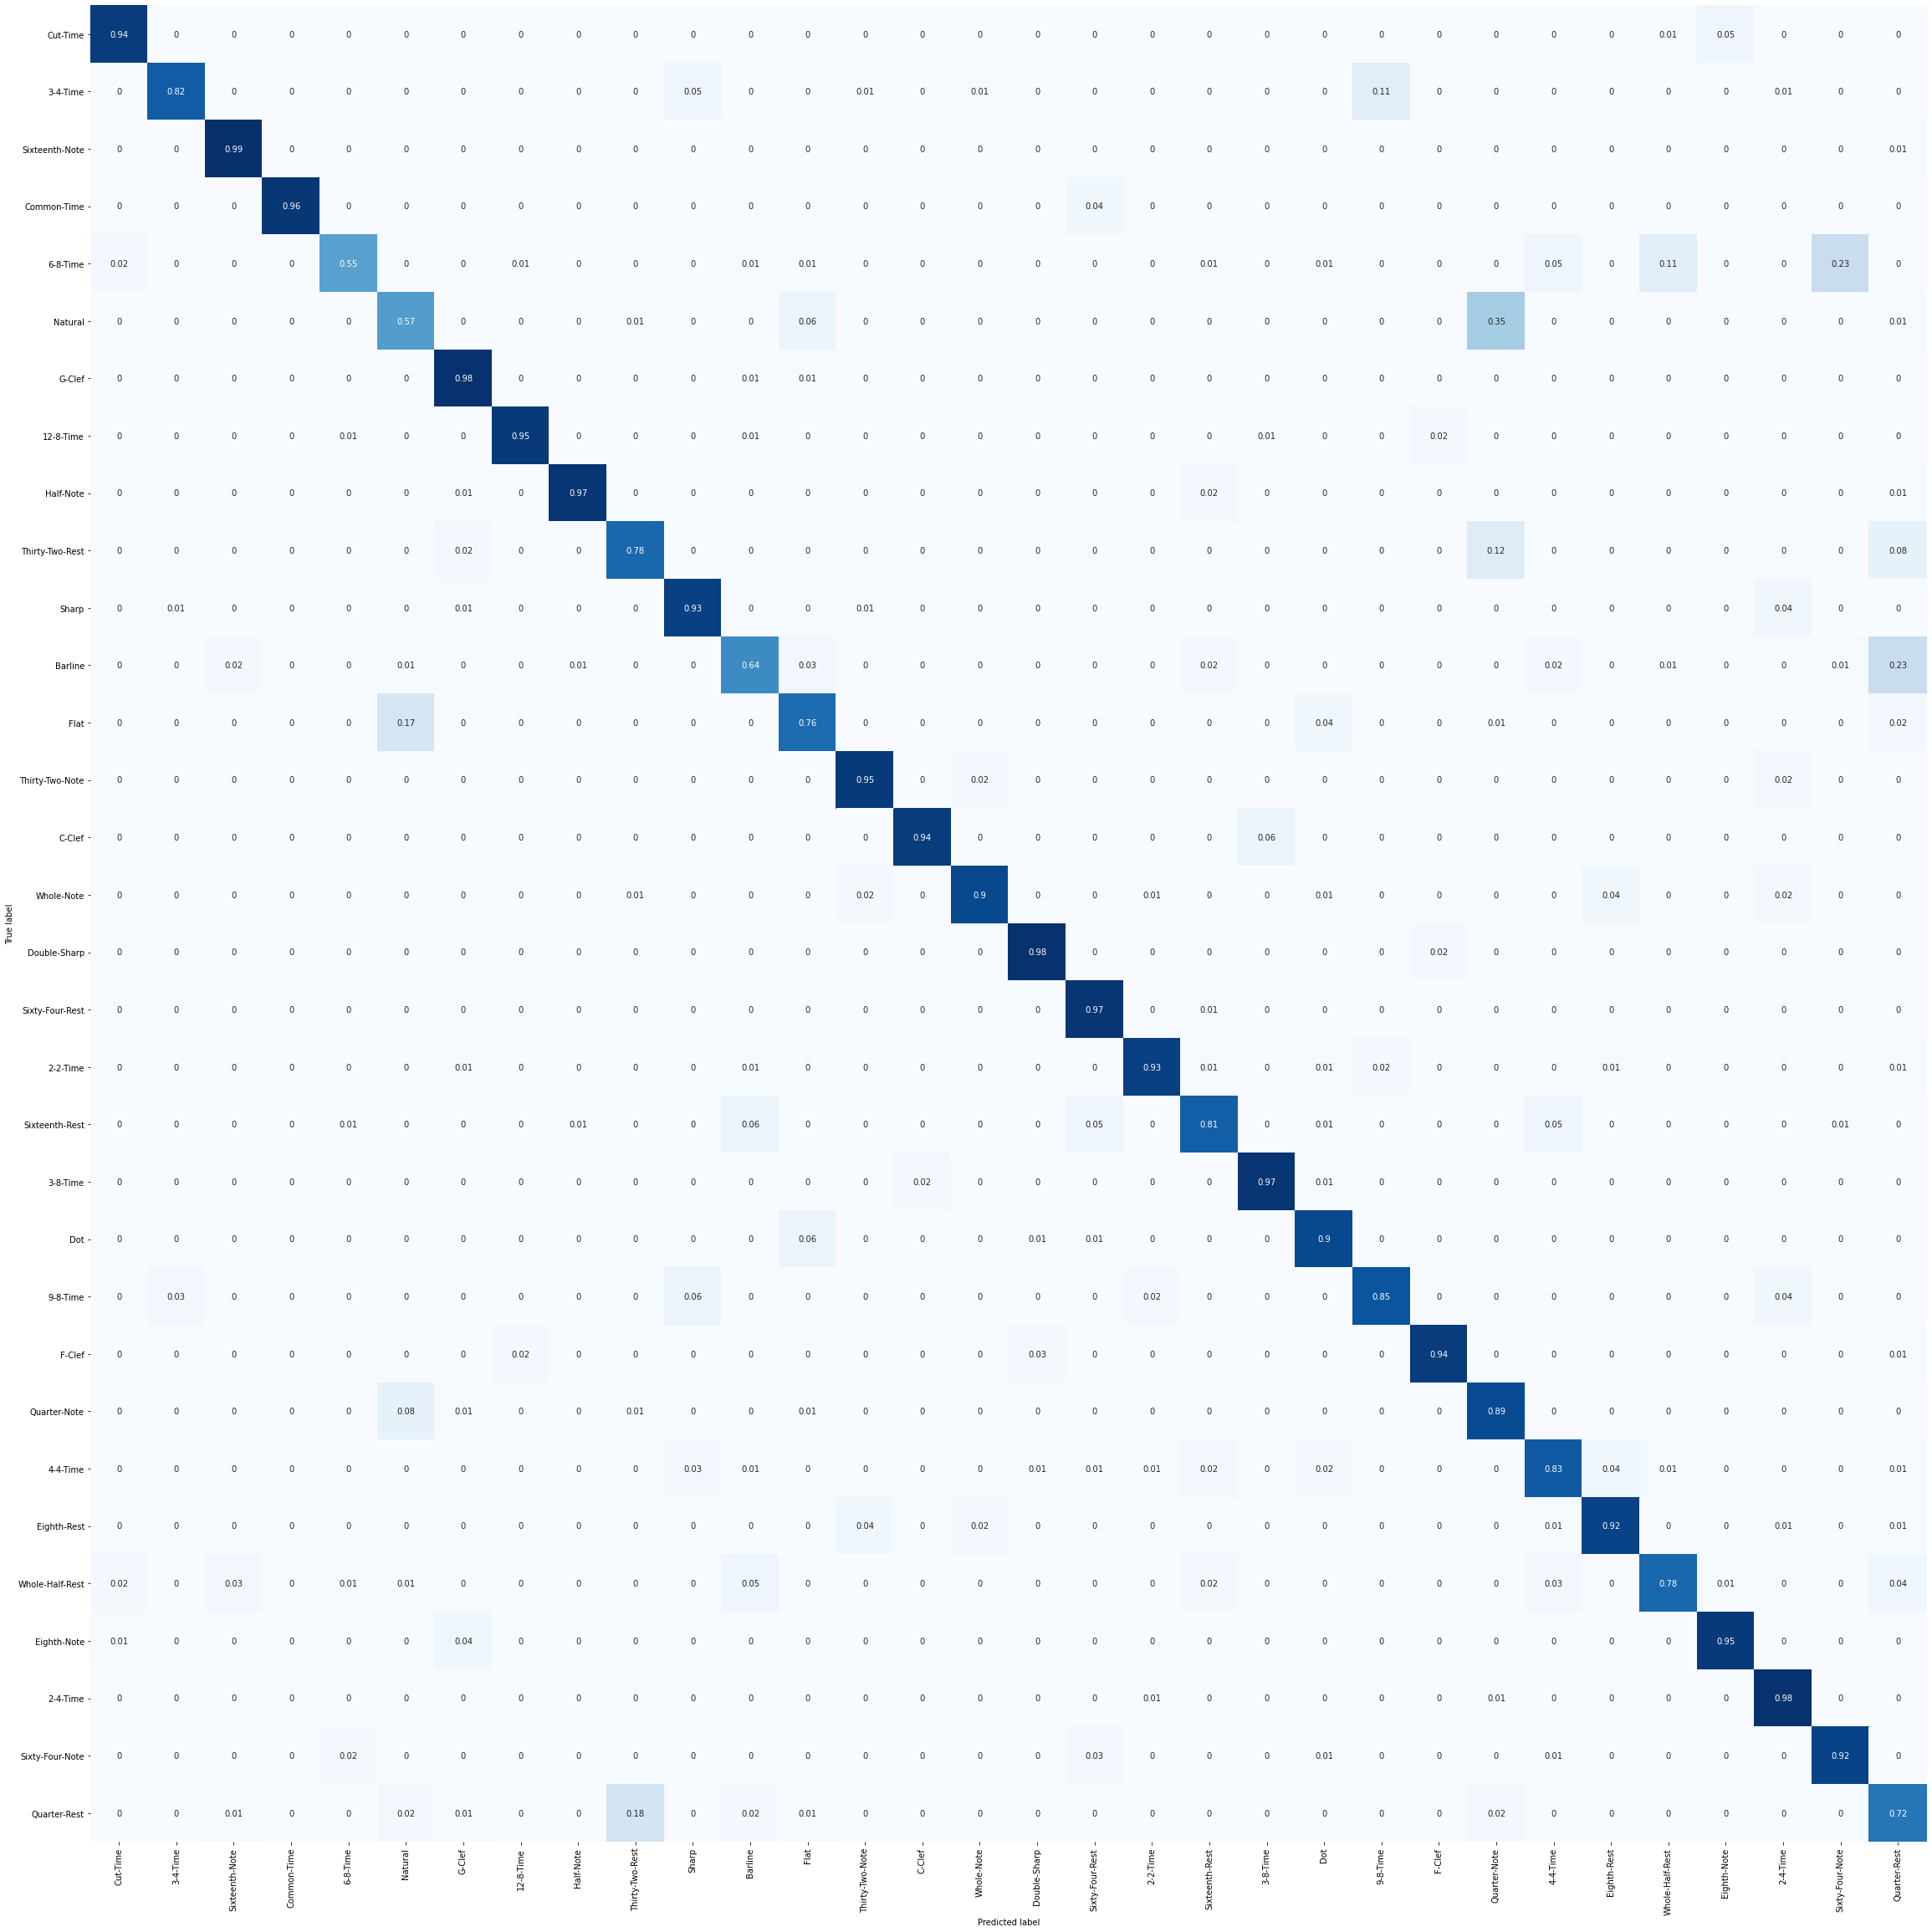

In [52]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = CLASS_NAMES, 
                     columns = CLASS_NAMES)

figure = plt.figure(figsize=(32, 32))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("Matriz de Confusão norm2")
plt.savefig("Matriz de Confusão norm2.pdf")
plt.show()

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [54]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       122
           1       0.95      0.82      0.88       120
           2       0.94      0.99      0.97       120
           3       1.00      0.96      0.98       121
           4       0.89      0.55      0.68       120
           5       0.68      0.57      0.62       240
           6       0.90      0.98      0.94       120
           7       0.97      0.95      0.96       120
           8       0.97      0.97      0.97       120
           9       0.76      0.78      0.77       120
          10       0.87      0.93      0.90       119
          11       0.79      0.64      0.71       120
          12       0.82      0.76      0.79       241
          13       0.93      0.95      0.94       120
          14       0.97      0.94      0.96       120
          15       0.95      0.90      0.92       120
          16       0.93      0.97      0.95       120
          17       0.92    

In [ ]:
y_true, y_pred

In [74]:
y_pred.shape

(4564,)

In [75]:
y2_true = np.argmax(y_true, axis=0)

In [77]:
y2_true.shape

()

In [80]:
arr = np.asarray(y_true)

In [83]:
y_class = np.argmax(y_pred, axis = 0)

In [82]:
 y2_class = np.argmax(arr, axis = 0)

In [85]:
roc_auc_score(arr, test_predictions_baseline, multi_class='ovr') 

0.9967006278844048

In [99]:
 !zip -r log3.zip drive/dados/Pesos/

  adding: drive/dados/Pesos/ (stored 0%)
  adding: drive/dados/Pesos/model_1.h5 (deflated 29%)
  adding: drive/dados/Pesos/model_2.h5 (deflated 32%)
  adding: drive/dados/Pesos/model_4.h5 (deflated 29%)
  adding: drive/dados/Pesos/model_3.h5 (deflated 27%)
  adding: drive/dados/Pesos/model_5.h5 (deflated 30%)


In [ ]:
from google.colab import files

files.download('log.zip')

In [94]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [100]:
!cp log3.zip '/content/gdrive/MyDrive/'

In [86]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       122
           1       0.95      0.82      0.88       120
           2       0.94      0.99      0.97       120
           3       1.00      0.96      0.98       121
           4       0.89      0.55      0.68       120
           5       0.68      0.57      0.62       240
           6       0.90      0.98      0.94       120
           7       0.97      0.95      0.96       120
           8       0.97      0.97      0.97       120
           9       0.76      0.78      0.77       120
          10       0.87      0.93      0.90       119
          11       0.79      0.64      0.71       120
          12       0.82      0.76      0.79       241
          13       0.93      0.95      0.94       120
          14       0.97      0.94      0.96       120
          15       0.95      0.90      0.92       120
          16       0.93      0.97      0.95       120
          17       0.92    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       120
           1       0.87      0.99      0.92       241
           2       0.93      0.63      0.75       120
           3       0.75      0.81      0.78       240
           4       0.78      0.77      0.77       120
           5       0.89      0.92      0.90       119
           6       0.89      0.93      0.91       120
           7       0.93      0.96      0.95       120
           8       0.79      0.83      0.81       120
           9       0.83      0.80      0.81       241
          10       0.99      0.95      0.97       121
          11       0.92      0.95      0.93       240
          12       0.68      0.76      0.72       240
          13       0.90      0.65      0.75       120
          14       0.85      0.91      0.88       240
          15       0.88      0.94      0.91       120
          16       0.82      0.72      0.76       120
          17       0.98    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.23      0.28       120
           1       0.83      0.94      0.88       241
           2       0.77      0.58      0.66       120
           3       0.61      0.86      0.71       240
           4       0.54      0.33      0.41       120
           5       0.59      0.72      0.65       119
           6       0.76      0.72      0.74       120
           7       0.91      0.88      0.90       120
           8       0.70      0.60      0.65       120
           9       0.62      0.61      0.61       241
          10       1.00      0.83      0.90       121
          11       0.81      0.75      0.78       240
          12       0.53      0.56      0.54       240
          13       0.63      0.23      0.33       120
          14       0.82      0.90      0.86       240
          15       0.84      0.90      0.87       120
          16       0.45      0.75      0.56       120
          17       1.00    

#Teste 08-09

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       120
           1       0.93      0.90      0.92       241
           2       0.73      0.55      0.63       120
           3       0.55      0.88      0.68       240
           4       0.93      0.32      0.47       120
           5       0.93      0.48      0.63       119
           6       0.56      0.61      0.58       120
           7       0.98      0.75      0.85       120
           8       0.87      0.34      0.49       120
           9       0.49      0.49      0.49       241
          10       0.99      0.93      0.96       121
          11       0.75      0.70      0.72       240
          12       0.40      0.54      0.46       240
          13       0.67      0.55      0.60       120
          14       0.84      0.89      0.87       240
          15       0.76      0.83      0.79       120
          16       0.67      0.61      0.64       120
          17       0.96    

#Resto

              precision    recall  f1-score   support

           0       0.28      0.11      0.16       120
           1       0.79      0.78      0.78       241
           2       0.50      0.63      0.56       120
           3       0.44      0.70      0.54       240
           4       0.77      0.37      0.50       120
           5       0.47      0.82      0.60       119
           6       0.70      0.23      0.35       120
           7       0.88      0.71      0.78       120
           8       0.64      0.55      0.59       120
           9       0.49      0.64      0.56       241
          10       0.68      0.96      0.80       121
          11       0.68      0.73      0.70       240
          12       0.35      0.17      0.23       240
          13       0.70      0.50      0.58       120
          14       0.64      0.72      0.68       240
          15       0.60      0.67      0.63       120
          16       0.45      0.42      0.43       120
          17       0.97    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       120
           1       0.64      0.58      0.61       120
           2       0.45      0.42      0.43       120
           3       0.34      0.37      0.35       240
           4       0.72      0.41      0.52       119
           5       0.99      0.92      0.95       121
           6       0.43      0.46      0.44       241
           7       0.66      0.83      0.74       120
           8       0.82      0.56      0.66       120
           9       0.62      0.92      0.74       120
          10       0.94      0.53      0.68       120
          11       0.99      0.78      0.87       120
          12       0.80      0.85      0.82       240
          13       0.56      0.62      0.59       120
          14       0.99      0.69      0.81       120
          15       0.47      0.91      0.62       240
          16       0.63      0.26      0.37       120
          17       0.92    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.52      0.65       120
           1       0.78      0.53      0.63       120
           2       0.83      0.91      0.87       120
           3       0.85      0.88      0.86       240
           4       0.95      0.69      0.80       120
           5       0.50      0.78      0.61       241
           6       0.76      0.87      0.81       122
           7       0.95      0.96      0.95       120
           8       0.73      0.93      0.82       120
           9       0.90      0.78      0.83       120
          10       0.75      0.93      0.83       120
          11       0.99      0.96      0.97       121
          12       0.94      0.89      0.91       241
          13       0.48      0.97      0.64       120
          14       0.62      0.89      0.73       120
          15       0.76      0.97      0.85       120
          16       0.99      0.78      0.87       120
          17       0.72    

In [ ]:
from datetime import datetime as dat

In [ ]:
today = dat.now()
today

datetime.datetime(2020, 9, 1, 15, 20, 26, 711326)

In [ ]:
date_time = today.strftime("%m/%d/%Y, %H:%M:%S")
date_time

'09/01/2020, 15:20:26'

In [ ]:
type(date_time)

str

In [ ]:
logges=classification_report(y_true, y_pred)

In [ ]:
text_file = open("classification_report.txt", "w")
n = text_file.write(logges)
text_file.close()

In [ ]:
logges.split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.89      0.52      0.65       120',
 '           1       0.78      0.53      0.63       120',
 '           2       0.83      0.91      0.87       120',
 '           3       0.85      0.88      0.86       240',
 '           4       0.95      0.69      0.80       120',
 '           5       0.50      0.78      0.61       241',
 '           6       0.76      0.87      0.81       122',
 '           7       0.95      0.96      0.95       120',
 '           8       0.73      0.93      0.82       120',
 '           9       0.90      0.78      0.83       120',
 '          10       0.75      0.93      0.83       120',
 '          11       0.99      0.96      0.97       121',
 '          12       0.94      0.89      0.91       241',
 '          13       0.48      0.97      0.64       120',
 '          14       0.62      0.89      0.73       120',
 '          15       0.76      0.97      0.85       120',
 '       

In [ ]:
has=np.load('model_history_4.npy',allow_pickle=True)

In [ ]:
type(has)

numpy.ndarray

In [ ]:
H=has.tolist()

In [ ]:
len(H)

18

In [ ]:
array({'loss': [3.330479145050049, 2.9896955490112305, 2.4788455963134766, 2.251863718032837, 2.0859498977661133, 1.9495164155960083, 1.8361116647720337, 1.7761664390563965, 1.6754518747329712, 1.6513001918792725, 1.5799578428268433, 1.5297554731369019, 1.4872753620147705, 1.444965124130249, 1.3707207441329956, 1.356225848197937, 1.3046764135360718, 1.272416591644287, 1.2463362216949463, 1.2393605709075928, 1.2245837450027466, 1.2087215185165405, 1.1911934614181519, 1.1230673789978027, 1.117648720741272, 1.102134108543396, 1.1066843271255493, 1.0610214471817017, 1.0784074068069458, 1.0576657056808472, 1.0126980543136597, 0.9948723912239075, 1.0156618356704712, 0.9809961318969727, 0.9656581282615662, 0.97556471824646, 0.9705901741981506, 0.9611259698867798, 0.9529638886451721, 0.9162940382957458, 0.9397096633911133, 0.8916851282119751, 0.8987128138542175, 0.8914803266525269, 0.8873670101165771, 0.8800539374351501, 0.8586493134498596, 0.8638939261436462, 0.8716513514518738, 0.8620395660400391, 0.8754288554191589, 0.84832763671875, 0.8477268218994141, 0.8124455213546753, 0.819442093372345, 0.826296865940094, 0.8243660926818848, 0.7949804663658142, 0.8163686394691467, 0.8765527606010437, 0.8067499995231628],
       'tp': [1501.0, 144.0, 563.0, 862.0, 1153.0, 1409.0, 1656.0, 1798.0, 1966.0, 2093.0, 2309.0, 2447.0, 2575.0, 2695.0, 3000.0, 3059.0, 3281.0, 3385.0, 3407.0, 3497.0, 3627.0, 3592.0, 3685.0, 3975.0, 3975.0, 4082.0, 4037.0, 4191.0, 4179.0, 4252.0, 4423.0, 4490.0, 4451.0, 4569.0, 4650.0, 4647.0, 4684.0, 4665.0, 4710.0, 4880.0, 4806.0, 4957.0, 4992.0, 5010.0, 5038.0, 5068.0, 5140.0, 5125.0, 5116.0, 5128.0, 5112.0, 5173.0, 5205.0, 5384.0, 5380.0, 5287.0, 5324.0, 5393.0, 5377.0, 5052.0, 5371.0], 
       'fp': [355.0, 140.0, 244.0, 423.0, 504.0, 603.0, 671.0, 679.0, 770.0, 739.0, 846.0, 840.0, 897.0, 913.0, 957.0, 941.0, 1047.0, 1017.0, 1094.0, 1043.0, 1053.0, 1119.0, 1116.0, 1125.0, 1196.0, 1111.0, 1134.0, 1191.0, 1252.0, 1150.0, 1179.0, 1165.0, 1215.0, 1184.0, 1202.0, 1136.0, 1221.0, 1217.0, 1279.0, 1172.0, 1225.0, 1216.0, 1234.0, 1240.0, 1229.0, 1263.0, 1195.0, 1284.0, 1204.0, 1221.0, 1254.0, 1218.0, 1272.0, 1190.0, 1225.0, 1212.0, 1236.0, 1232.0, 1165.0, 1306.0, 1216.0], 
       'tn': [329361.0, 263639.0, 263535.0, 263356.0, 263275.0, 263176.0, 263108.0, 263100.0, 263009.0, 263040.0, 262933.0, 262939.0, 262882.0, 262866.0, 262822.0, 262838.0, 262732.0, 262762.0, 262685.0, 262736.0, 262726.0, 262660.0, 262663.0, 262654.0, 262583.0, 262668.0, 262645.0, 262588.0, 262527.0, 262629.0, 262600.0, 262614.0, 262564.0, 262595.0, 262577.0, 262643.0, 262558.0, 262562.0, 262500.0, 262607.0, 262554.0, 262563.0, 262545.0, 262539.0, 262550.0, 262516.0, 262584.0, 262495.0, 262575.0, 262558.0, 262525.0, 262561.0, 262507.0, 262589.0, 262554.0, 262567.0, 262543.0, 262547.0, 262614.0, 262473.0, 262563.0], 
       'fn': [9135.0, 8365.0, 7946.0, 7647.0, 7356.0, 7100.0, 6853.0, 6711.0, 6543.0, 6416.0, 6200.0, 6062.0, 5934.0, 5814.0, 5509.0, 5450.0, 5228.0, 5124.0, 5102.0, 5012.0, 4882.0, 4917.0, 4824.0, 4534.0, 4534.0, 4427.0, 4472.0, 4318.0, 4330.0, 4257.0, 4086.0, 4019.0, 4058.0, 3940.0, 3859.0, 3862.0, 3825.0, 3844.0, 3799.0, 3629.0, 3703.0, 3552.0, 3517.0, 3499.0, 3471.0, 3441.0, 3369.0, 3384.0, 3393.0, 3381.0, 3397.0, 3336.0, 3304.0, 3125.0, 3129.0, 3222.0, 3185.0, 3116.0, 3132.0, 3457.0, 3138.0],
       'accuracy': [0.9721171259880066, 0.9687646627426147, 0.9699215292930603, 0.9703622460365295, 0.9711335301399231, 0.9717100858688354, 0.9723674654960632, 0.9728596210479736, 0.9731423854827881, 0.9737226963043213, 0.9741230010986328, 0.9746518135070801, 0.9749125838279724, 0.9752945303916931, 0.976253092288971, 0.976528525352478, 0.9769545197486877, 0.9774466753005981, 0.9772446751594543, 0.9777625203132629, 0.9782032370567322, 0.9778323173522949, 0.9781848788261414, 0.9792168736457825, 0.9789561033248901, 0.979661226272583, 0.9794114828109741, 0.9797677397727966, 0.9794996380805969, 0.98014235496521, 0.9806638360023499, 0.9809613227844238, 0.9806344509124756, 0.9811816811561584, 0.9814130663871765, 0.9816444516181946, 0.981468141078949, 0.9814130663871765, 0.9813506007194519, 0.9823679327964783, 0.9819015264511108, 0.9824891090393066, 0.9825515747070312, 0.9825956225395203, 0.9827388525009155, 0.9827241897583008, 0.9832383394241333, 0.9828563928604126, 0.9831171631813049, 0.9830988049507141, 0.9829187989234924, 0.9832750558853149, 0.9831942915916443, 0.9841527938842773, 0.9840095639228821, 0.9837157726287842, 0.9837635159492493, 0.984031617641449, 0.9842188954353333, 0.9825074672698975, 0.9840095639228821],
       'precision': [0.8087284564971924, 0.5070422291755676, 0.6976456046104431, 0.6708171367645264, 0.6958358287811279, 0.7002981901168823, 0.7116459012031555, 0.7258780598640442, 0.7185672521591187, 0.7390536665916443, 0.7318542003631592, 0.7444478273391724, 0.741647481918335, 0.7469512224197388, 0.7581501007080078, 0.7647500038146973, 0.7580868601799011, 0.7689686417579651, 0.7569429278373718, 0.7702643275260925, 0.7749999761581421, 0.7624708414077759, 0.7675484418869019, 0.779411792755127, 0.7687101364135742, 0.7860581278800964, 0.7807000875473022, 0.7787067890167236, 0.7694715261459351, 0.7871158719062805, 0.7895394563674927, 0.7939876317977905, 0.7855629920959473, 0.7941943407058716, 0.7946001291275024, 0.8035621643066406, 0.7932260632514954, 0.7930976152420044, 0.7864418029785156, 0.8063449859619141, 0.7968827486038208, 0.8030131459236145, 0.8017988801002502, 0.8015999794006348, 0.8038933873176575, 0.8005054593086243, 0.8113654255867004, 0.7996567487716675, 0.8094936609268188, 0.8076862692832947, 0.8030160069465637, 0.8094195127487183, 0.8036127686500549, 0.8189838528633118, 0.8145344257354736, 0.8135097622871399, 0.8115853667259216, 0.8140377402305603, 0.8219199180603027, 0.7945895195007324, 0.8153939843177795], 
       'recall': [0.14112448692321777, 0.01692325808107853, 0.06616523861885071, 0.10130450129508972, 0.1355035901069641, 0.16558937728405, 0.19461746513843536, 0.2113056778907776, 0.23104947805404663, 0.2459748536348343, 0.27135974168777466, 0.28757786750793457, 0.3026207685470581, 0.31672346591949463, 0.3525678813457489, 0.3595016896724701, 0.3855917155742645, 0.3978140652179718, 0.4003995656967163, 0.4109766185283661, 0.426254540681839, 0.42214125394821167, 0.4330708682537079, 0.4671524167060852, 0.4671524167060852, 0.4797273576259613, 0.4744388163089752, 0.49253731966018677, 0.49112704396247864, 0.4997061789035797, 0.5198025703430176, 0.5276765823364258, 0.5230932235717773, 0.5369608402252197, 0.5464801788330078, 0.5461276173591614, 0.5504759550094604, 0.5482430458068848, 0.5535315275192261, 0.5735104084014893, 0.5648137331008911, 0.5825596451759338, 0.5866729617118835, 0.5887883305549622, 0.5920789837837219, 0.595604658126831, 0.6040663123130798, 0.6023034453392029, 0.6012457609176636, 0.6026560068130493, 0.6007756590843201, 0.6079445481300354, 0.6117052435874939, 0.6327418088912964, 0.6322717070579529, 0.621342122554779, 0.6256904602050781, 0.6337994933128357, 0.6319191455841064, 0.5937243103981018, 0.6312140226364136], 
       'auc': [0.7421395182609558, 0.7639307975769043, 0.8639654517173767, 0.8942106366157532, 0.9116737246513367, 0.9250541925430298, 0.934032142162323, 0.9383733868598938, 0.9461694359779358, 0.9479608535766602, 0.9521480202674866, 0.9557749032974243, 0.9583096504211426, 0.959998607635498, 0.9633471369743347, 0.9647400975227356, 0.9673311710357666, 0.9686684012413025, 0.9703922271728516, 0.9700593948364258, 0.9707739949226379, 0.9716799855232239, 0.9725203514099121, 0.9745091199874878, 0.975350558757782, 0.9758323431015015, 0.9754142761230469, 0.9776018261909485, 0.9767881035804749, 0.9772527813911438, 0.9793708324432373, 0.9799442291259766, 0.9788457155227661, 0.9800119400024414, 0.9810349345207214, 0.980076014995575, 0.9807578325271606, 0.9806115031242371, 0.9812048673629761, 0.9824286103248596, 0.9813268780708313, 0.983538031578064, 0.9829409718513489, 0.9835579991340637, 0.9830809235572815, 0.983102023601532, 0.9842283129692078, 0.9843505620956421, 0.9833045601844788, 0.9844338297843933, 0.9838510751724243, 0.9847069978713989, 0.9848141074180603, 0.9853402972221375, 0.9858293533325195, 0.9851850867271423, 0.9849646687507629, 0.9865809679031372, 0.9856953024864197, 0.9845000505447388, 0.9858867526054382], 
       
       'val_loss': [3.2434020042419434, 3.2119593620300293, 5.147470951080322, 3.527893304824829, 3.7675070762634277, 3.526627540588379, 4.2594804763793945, 3.468989849090576, 2.508962631225586, 2.5573859214782715, 3.261660575866699, 2.7777390480041504, 2.926553726196289, 3.289189100265503, 2.697262763977051, 2.0506932735443115, 2.658153772354126, 2.454127788543701, 2.0066580772399902, 1.8778034448623657, 1.9863641262054443, 1.6218578815460205, 2.1999082565307617, 1.7597095966339111, 1.698079228401184, 1.6466410160064697, 2.380622625350952, 2.078167200088501, 1.170975685119629, 1.4347537755966187, 1.217219352722168, 1.3285163640975952, 1.6623377799987793, 1.5673394203186035, 1.1259329319000244, 1.5080496072769165, 1.3330665826797485, 1.6301851272583008, 1.2969863414764404, 1.1918326616287231, 0.9486212134361267, 1.138494610786438, 1.027416706085205, 0.9810397028923035, 1.4101603031158447, 1.5624252557754517, 1.6287885904312134, 1.799184799194336, 0.8794532418251038, 1.1895440816879272, 0.7208015322685242, 1.1261357069015503, 1.0860569477081299, 1.2875564098358154, 1.0834946632385254, 0.9257155656814575, 0.8694706559181213, 0.9440094232559204, 1.3242125511169434, 1.442392349243164, 1.042850136756897],
       'val_tp': [40.0, 148.0, 118.0, 237.0, 309.0, 326.0, 346.0, 402.0, 541.0, 530.0, 425.0, 495.0, 527.0, 522.0, 646.0, 748.0, 603.0, 709.0, 818.0, 820.0, 780.0, 941.0, 766.0, 892.0, 925.0, 998.0, 734.0, 829.0, 1147.0, 1047.0, 1158.0, 1085.0, 998.0, 1010.0, 1161.0, 1008.0, 1067.0, 1013.0, 1115.0, 1228.0, 1291.0, 1194.0, 1270.0, 1330.0, 1087.0, 992.0, 1035.0, 961.0, 1382.0, 1193.0, 1488.0, 1264.0, 1272.0, 1172.0, 1290.0, 1353.0, 1355.0, 1354.0, 1108.0, 1003.0, 1302.0], 
       'val_fp': [26.0, 140.0, 601.0, 396.0, 596.0, 557.0, 681.0, 625.0, 592.0, 631.0, 769.0, 673.0, 791.0, 874.0, 762.0, 618.0, 710.0, 691.0, 642.0, 629.0, 547.0, 548.0, 680.0, 611.0, 577.0, 539.0, 774.0, 718.0, 433.0, 612.0, 498.0, 535.0, 636.0, 631.0, 497.0, 600.0, 593.0, 649.0, 531.0, 480.0, 451.0, 505.0, 452.0, 405.0, 635.0, 685.0, 702.0, 745.0, 417.0, 579.0, 365.0, 522.0, 532.0, 599.0, 493.0, 439.0, 388.0, 467.0, 613.0, 715.0, 519.0], 
       'val_tn': [65911.0, 65797.0, 65336.0, 65541.0, 65341.0, 65380.0, 65256.0, 65312.0, 65345.0, 65306.0, 65168.0, 65264.0, 65146.0, 65063.0, 65175.0, 65319.0, 65227.0, 65246.0, 65295.0, 65308.0, 65390.0, 65389.0, 65257.0, 65326.0, 65360.0, 65398.0, 65163.0, 65219.0, 65504.0, 65325.0, 65439.0, 65402.0, 65301.0, 65306.0, 65440.0, 65337.0, 65344.0, 65288.0, 65406.0, 65457.0, 65486.0, 65432.0, 65485.0, 65532.0, 65302.0, 65252.0, 65235.0, 65192.0, 65520.0, 65358.0, 65572.0, 65415.0, 65405.0, 65338.0, 65444.0, 65498.0, 65549.0, 65470.0, 65324.0, 65222.0, 65418.0],
       'val_fn': [2087.0, 1979.0, 2009.0, 1890.0, 1818.0, 1801.0, 1781.0, 1725.0, 1586.0, 1597.0, 1702.0, 1632.0, 1600.0, 1605.0, 1481.0, 1379.0, 1524.0, 1418.0, 1309.0, 1307.0, 1347.0, 1186.0, 1361.0, 1235.0, 1202.0, 1129.0, 1393.0, 1298.0, 980.0, 1080.0, 969.0, 1042.0, 1129.0, 1117.0, 966.0, 1119.0, 1060.0, 1114.0, 1012.0, 899.0, 836.0, 933.0, 857.0, 797.0, 1040.0, 1135.0, 1092.0, 1166.0, 745.0, 934.0, 639.0, 863.0, 855.0, 955.0, 837.0, 774.0, 772.0, 773.0, 1019.0, 1124.0, 825.0], 
       'val_accuracy': [0.9689556956291199, 0.9688675403594971, 0.9616537094116211, 0.9664139747619629, 0.9645333886146545, 0.9653561115264893, 0.9638281464576721, 0.9654736518859863, 0.9680007100105286, 0.9672660827636719, 0.9636959433555603, 0.966134786605835, 0.9648712873458862, 0.9635784029960632, 0.9670457243919373, 0.9706599712371826, 0.9671779274940491, 0.9690144658088684, 0.9713358283042908, 0.9715561866760254, 0.972173273563385, 0.9745239615440369, 0.9700134992599487, 0.9728784561157227, 0.9738628268241882, 0.9754936695098877, 0.9681622982025146, 0.9703808426856995, 0.9792401194572449, 0.9751410484313965, 0.9784467816352844, 0.9768306016921997, 0.9740685224533081, 0.974318265914917, 0.978505551815033, 0.9747443795204163, 0.9757140278816223, 0.9740979075431824, 0.9773301482200623, 0.9797396659851074, 0.981091320514679, 0.9788728356361389, 0.980768084526062, 0.9823401570320129, 0.9753907918930054, 0.9732604622840881, 0.9736424684524536, 0.9719234704971313, 0.9829278588294983, 0.9777709245681763, 0.9852491617202759, 0.9796515107154846, 0.9796221256256104, 0.9771685600280762, 0.9804595708847046, 0.9821785092353821, 0.9829572439193726, 0.9817818403244019, 0.9760225415229797, 0.972981333732605, 0.9802538752555847], 
       'val_precision': [0.6060606241226196, 0.5138888955116272, 0.16411682963371277, 0.3744075894355774, 0.3414364755153656, 0.3691959083080292, 0.3369036018848419, 0.39143136143684387, 0.47749337553977966, 0.4565030038356781, 0.3559463918209076, 0.42380136251449585, 0.39984825253486633, 0.37392550706863403, 0.4588068127632141, 0.5475841760635376, 0.45925360918045044, 0.506428599357605, 0.5602739453315735, 0.5659075379371643, 0.5877920389175415, 0.6319677829742432, 0.5297372341156006, 0.5934796929359436, 0.6158455610275269, 0.6493168473243713, 0.4867374002933502, 0.5358759164810181, 0.7259493470191956, 0.6311030983924866, 0.6992753744125366, 0.6697530746459961, 0.610771119594574, 0.6154783964157104, 0.7002412676811218, 0.6268656849861145, 0.6427710652351379, 0.6095066070556641, 0.677399754524231, 0.7189695835113525, 0.7411021590232849, 0.7027663588523865, 0.7375144958496094, 0.7665706276893616, 0.6312427520751953, 0.5915324687957764, 0.5958549380302429, 0.5633059740066528, 0.7682045698165894, 0.6732505559921265, 0.8030221462249756, 0.707726776599884, 0.7050997614860535, 0.6617730259895325, 0.7234997153282166, 0.7550223469734192, 0.7773953080177307, 0.7435474991798401, 0.6438117623329163, 0.5838183760643005, 0.7149917483329773],
       'val_recall': [0.01880582980811596, 0.06958156824111938, 0.05547719821333885, 0.11142454296350479, 0.1452750414609909, 0.1532675176858902, 0.16267043352127075, 0.18899859488010406, 0.25434884428977966, 0.2491772472858429, 0.1998119354248047, 0.23272214829921722, 0.24776680767536163, 0.2454160749912262, 0.30371415615081787, 0.3516690135002136, 0.2834978699684143, 0.3333333432674408, 0.38457921147346497, 0.38551950454711914, 0.36671367287635803, 0.44240716099739075, 0.3601316511631012, 0.41936999559402466, 0.43488481640815735, 0.46920543909072876, 0.3450869917869568, 0.38975080847740173, 0.5392571687698364, 0.49224260449409485, 0.5444287657737732, 0.5101081132888794, 0.46920543909072876, 0.4748471975326538, 0.5458391904830933, 0.47390690445899963, 0.5016455054283142, 0.47625765204429626, 0.5242124795913696, 0.5773389935493469, 0.6069581508636475, 0.5613540410995483, 0.5970851182937622, 0.6252938508987427, 0.511048436164856, 0.4663845896720886, 0.4866008460521698, 0.4518100619316101, 0.6497414112091064, 0.5608838796615601, 0.6995768547058105, 0.5942642092704773, 0.598025381565094, 0.55101078748703, 0.6064879894256592, 0.6361072063446045, 0.6370474696159363, 0.6365773677825928, 0.5209214687347412, 0.4715561866760254, 0.6121297478675842], 
       'val_auc': [0.6833968758583069, 0.7556934356689453, 0.6072837710380554, 0.7533562183380127, 0.7493225932121277, 0.7851139903068542, 0.721311092376709, 0.7927435040473938, 0.877933144569397, 0.8738158941268921, 0.8179996609687805, 0.8566311597824097, 0.846041738986969, 0.8260554075241089, 0.8614622354507446, 0.9101715683937073, 0.8628501892089844, 0.8838596940040588, 0.9120444655418396, 0.924049973487854, 0.9162430763244629, 0.9431664943695068, 0.9014119505882263, 0.9323202967643738, 0.9338933825492859, 0.9381894469261169, 0.8913464546203613, 0.9073036313056946, 0.9660933017730713, 0.9545668363571167, 0.9665021896362305, 0.9606984853744507, 0.9372285604476929, 0.9431546926498413, 0.9716591835021973, 0.9506253600120544, 0.9597933292388916, 0.939228355884552, 0.9605181813240051, 0.9636498093605042, 0.9776879549026489, 0.968543291091919, 0.9746870398521423, 0.9746971726417542, 0.9546931385993958, 0.9483403563499451, 0.9411408305168152, 0.9313358068466187, 0.9794741272926331, 0.9669956564903259, 0.986338198184967, 0.9673705101013184, 0.9711788296699524, 0.9614323377609253, 0.9693601131439209, 0.978029191493988, 0.9808191061019897, 0.976219117641449, 0.9617117047309875, 0.9571288824081421, 0.9730949401855469]},
      dtype=object)

In [ ]:
 hist = pd.DataFrame(H)
# hist['epoch'] = history.epoch

In [ ]:
hist.head()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc
0,3.330479,1501.0,355.0,329361.0,9135.0,0.972117,0.808728,0.141124,0.742140,3.243402,40.0,26.0,65911.0,2087.0,0.968956,0.606061,0.018806,0.683397
1,2.989696,144.0,140.0,263639.0,8365.0,0.968765,0.507042,0.016923,0.763931,3.211959,148.0,140.0,65797.0,1979.0,0.968868,0.513889,0.069582,0.755693
2,2.478846,563.0,244.0,263535.0,7946.0,0.969922,0.697646,0.066165,0.863965,5.147471,118.0,601.0,65336.0,2009.0,0.961654,0.164117,0.055477,0.607284
3,2.251864,862.0,423.0,263356.0,7647.0,0.970362,0.670817,0.101305,0.894211,3.527893,237.0,396.0,65541.0,1890.0,0.966414,0.374408,0.111425,0.753356
4,2.085950,1153.0,504.0,263275.0,7356.0,0.971134,0.695836,0.135504,0.911674,3.767507,309.0,596.0,65341.0,1818.0,0.964533,0.341436,0.145275,0.749323


In [ ]:
hist['loss']

0     3.330479
1     2.989696
2     2.478846
3     2.251864
4     2.085950
        ...   
56    0.824366
57    0.794980
58    0.816369
59    0.876553
60    0.806750
Name: loss, Length: 61, dtype: float64

In [ ]:
hist['accuracy']

0     0.972117
1     0.968765
2     0.969922
3     0.970362
4     0.971134
        ...   
56    0.983764
57    0.984032
58    0.984219
59    0.982507
60    0.984010
Name: accuracy, Length: 61, dtype: float64

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       120
           1       0.84      0.49      0.62       120
           2       0.74      0.82      0.78       120
           3       0.81      0.91      0.86       240
           4       0.97      0.70      0.81       120
           5       0.60      0.62      0.61       241
           6       0.90      0.71      0.79       122
           7       0.95      0.96      0.95       120
           8       0.68      0.91      0.78       120
           9       0.83      0.84      0.84       120
          10       0.74      0.94      0.83       120
          11       1.00      0.99      1.00       121
          12       0.90      0.98      0.93       241
          13       0.48      0.96      0.64       120
          14       0.72      0.78      0.75       120
          15       0.86      0.94      0.90       120
          16       0.95      0.88      0.91       120
          17       0.73    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       120
           1       0.96      0.93      0.94       120
           2       0.56      0.48      0.52       120
           3       0.73      0.84      0.78       120
           4       0.69      0.50      0.58       120
           5       0.97      0.80      0.88       120
           6       0.75      0.84      0.80       122
           7       0.95      0.61      0.74       120
           8       0.44      0.33      0.38       240
           9       0.61      0.89      0.72       120
          10       0.68      0.51      0.58       120
          11       1.00      0.48      0.65       120
          12       0.86      0.20      0.32       120
          13       0.93      0.53      0.67       120
          14       0.46      0.53      0.49       120
          15       0.80      0.90      0.85       241
          16       0.79      0.82      0.81       120
          17       0.73    

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       120
           1       0.59      0.41      0.48       120
           2       0.59      0.73      0.65       240
           3       0.99      0.88      0.93       121
           4       0.78      0.76      0.77       240
           5       0.63      0.86      0.73       120
           6       0.49      0.15      0.23       120
           7       0.58      0.55      0.56       120
           8       0.75      0.73      0.74       120
           9       0.87      0.56      0.68       119
          10       0.51      0.51      0.51       120
          11       0.89      0.61      0.72       120
          12       0.36      0.92      0.51       120
          13       0.87      0.82      0.85       120
          14       0.51      0.68      0.58       120
          15       0.59      0.53      0.56       120
          16       0.98      0.74      0.84       120
          17       0.65    

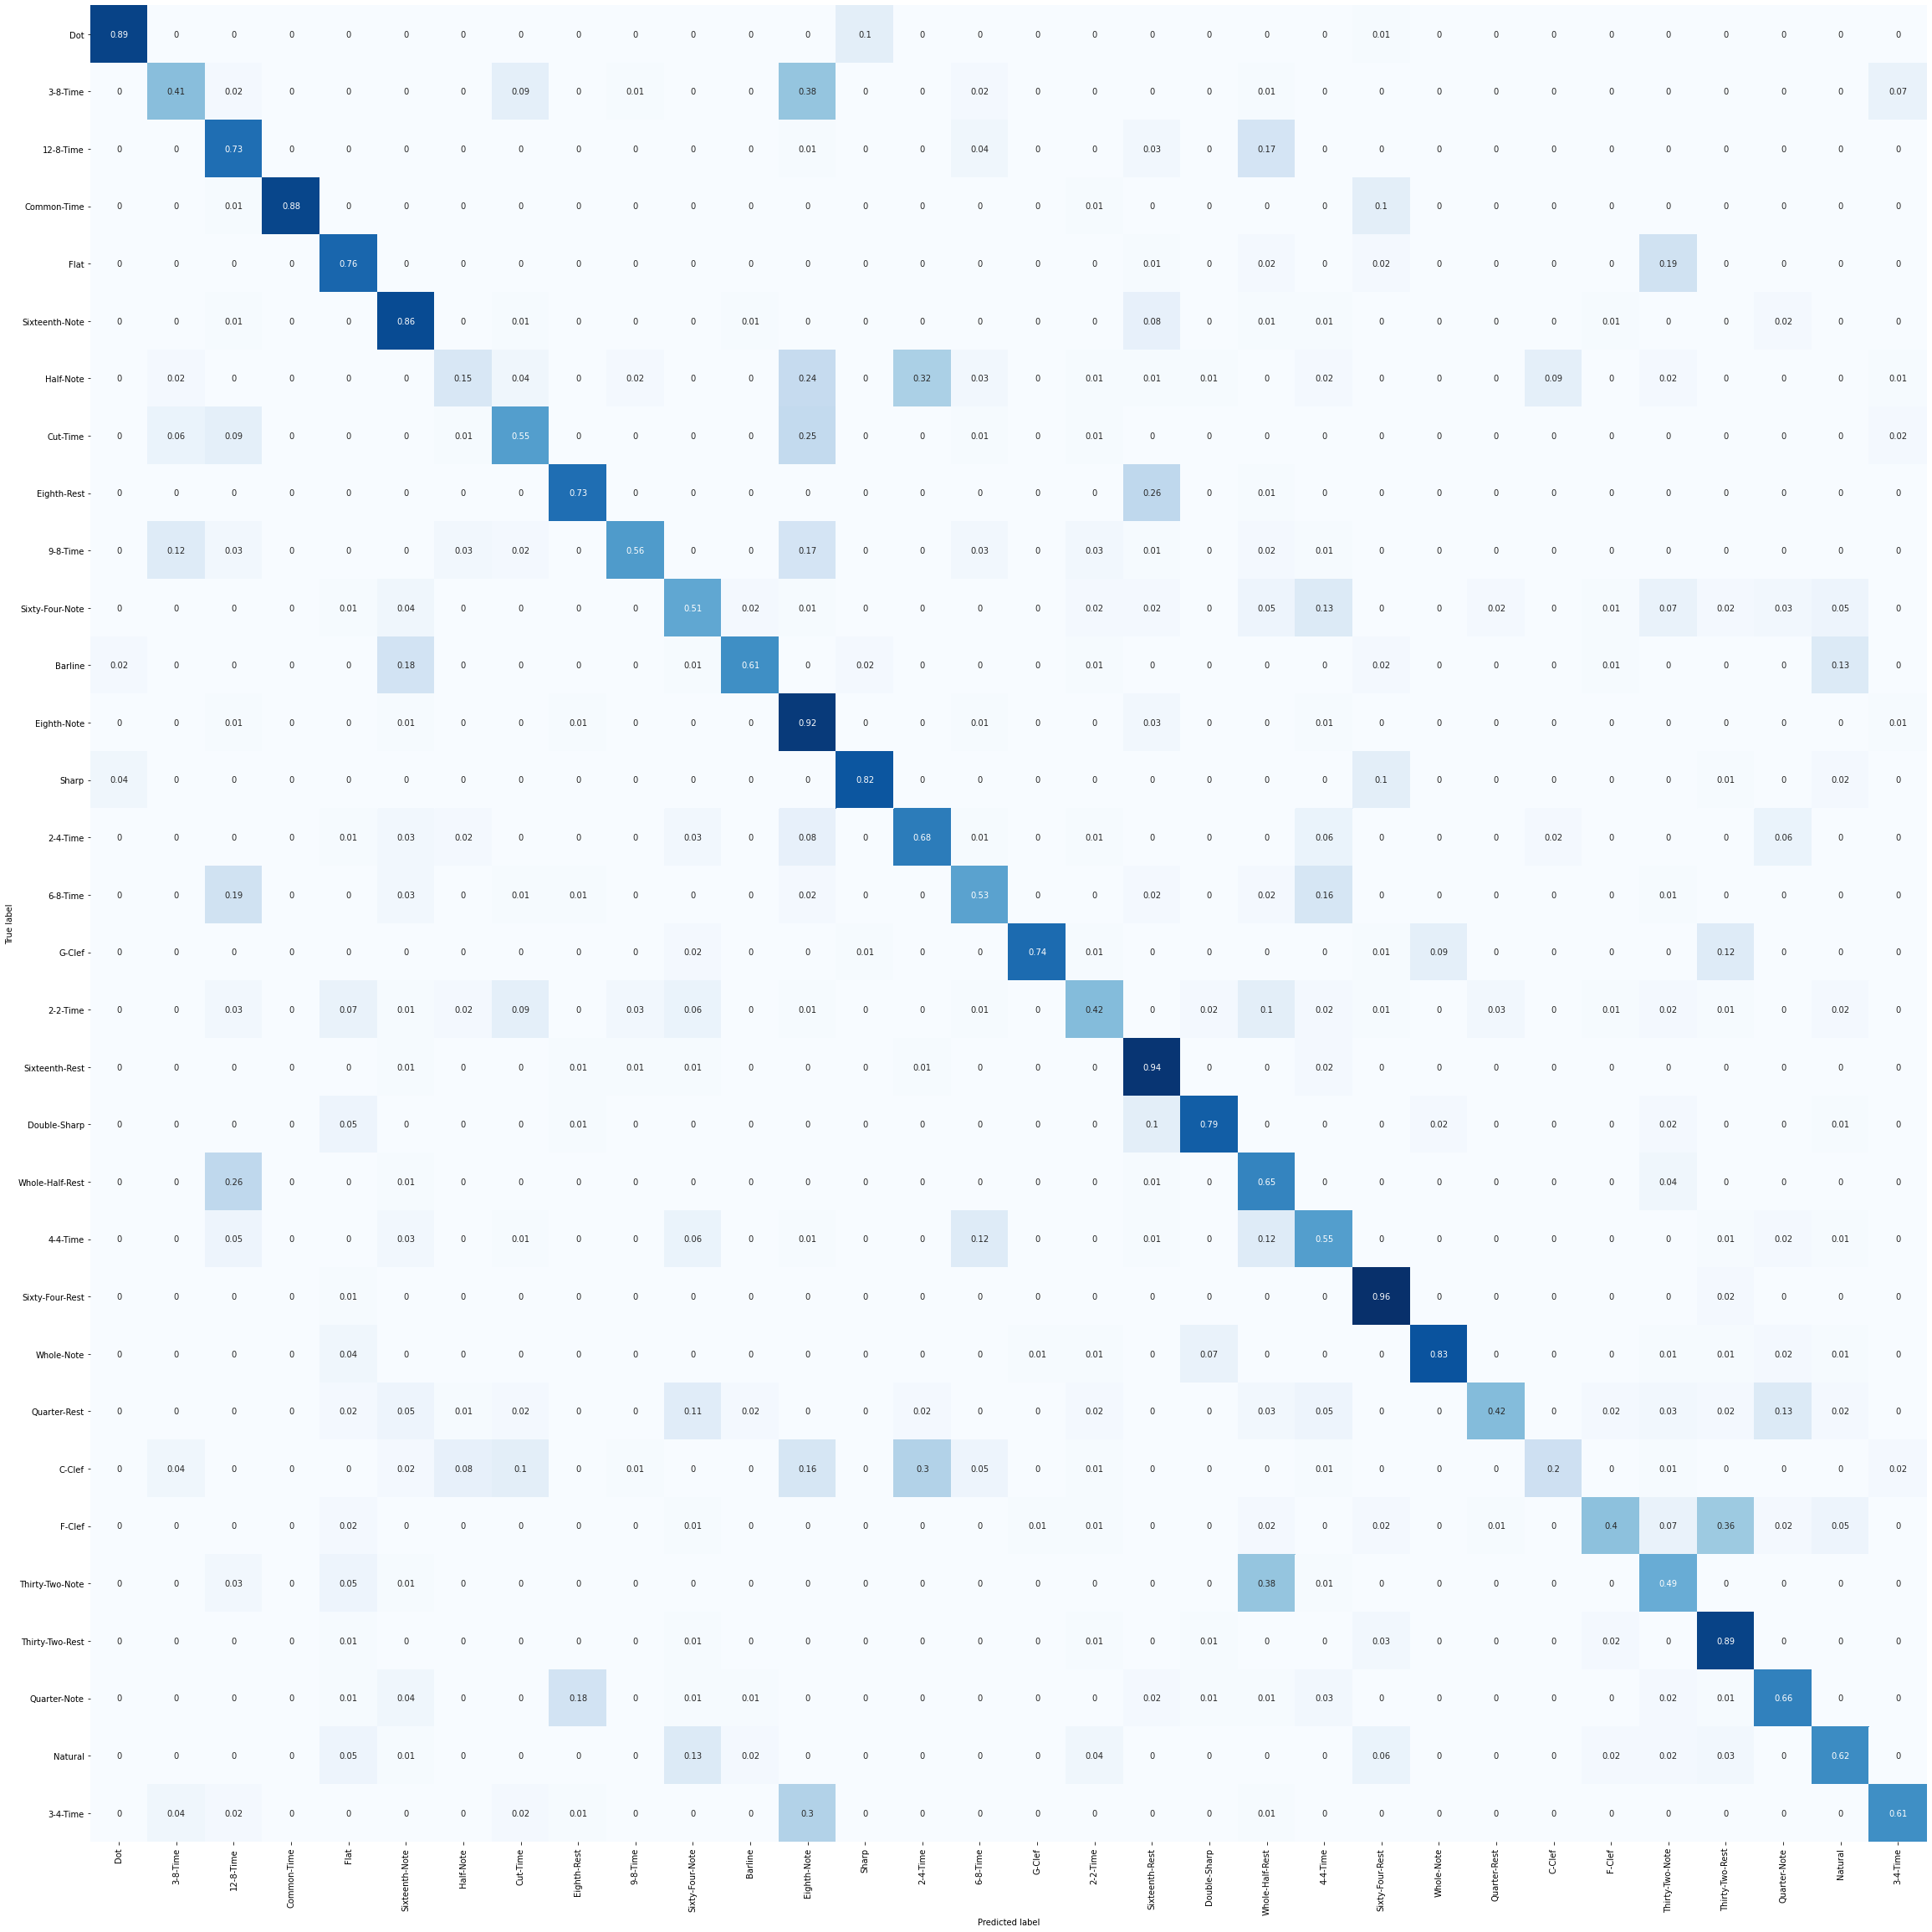

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = CLASS_NAMES, 
                     columns = CLASS_NAMES)

figure = plt.figure(figsize=(32, 32))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("Matriz de Confusão norm2")
plt.savefig("Matriz de Confusão norm2.pdf")
plt.show()

In [ ]:
 
 [  0   0   0   0   0   0   0   0   0 167  28   0 153 218   0   0]
 [  0   0   0   0   0   0   0   0  46 195   9  19 236  97   0   0]
 [  0   0   0   0   0   0   0   0 134 107   0 102 209  23   0   0]
 [  0   0   0   0   0   0   0   0 227 125  93 195 255 255  37   0]
 [  0   0   0   0   0  56 162 199 213 111 125 227   0  37   0   0]
 [  0  37 102 195 185 130 125 236   9   0 107 134   0   0   0   0]
 [ 97 246 121  28   0   0 195  65   0  19 236 144 148 148  93  93]
 [162 236   0   0   0  74 223  93 185 241 181  70   0   0   0   0]
 [  0   0  14  70 125 236 130  56  32 236   0   0   0   0   0   0]
 [  0  56 227 172 218 144   0   0 162 144   0   0   0   0   0   0]
 [  0  19  37  56 204   9   0   9 232  28   0   0   0   0   0   0]
 [  0   0  19 223  65   0   0 139 204   0   0   0   0   0   0   0]
 [  0   0 116 162   0   0  32 236 111   0   0   0   0   0   0   0]
 [  0  19 246 181   0   0 144 199   0   0   0   0   0   0   0   0]
 [  0 148 250  65   0   0  28  28   0   0   0   0   0   0   0   0]
 [ 37 241  93   0   0   0   0   0   0   0   0   0   0   0   0   0]
 